# Analysis of 1/48 Deg global ocean run
Relevant links -

https://medium.com/pangeo/petabytes-of-ocean-data-part-1-nasa-ecco-data-portal-81e3c5e077be 

https://xmitgcm.readthedocs.io/en/latest/llcreader.html

https://pangeo-data.github.io/pangeo-datastore/master/ocean/llc4320.html#llc4320-grid

https://ecco.jpl.nasa.gov/products/latest/user-guide/

In [1]:
import xarray as xr
import dask.array as da
from dask.distributed import Client, LocalCluster
from xgcm import Grid
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from xmitgcm import llcreader
import intake
%matplotlib inline

In [2]:
lc = LocalCluster(n_workers=1)
client = Client(lc)
client

Client Scheduler: tcp://127.0.0.1:35213 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 8 Memory: 33.22 GB


In [3]:
# Load grid data from web
cat = intake.Catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
dsgrid = cat["LLC4320_grid"].to_dask()
dsgrid = llcreader.faces_dataset_to_latlon(dsgrid, metric_vector_pairs=[('dxC', 'dyC'), ('dyG', 'dxG')])

model = llcreader.ECCOPortalLLC4320Model()
ds = model.get_dataset(varnames=['Eta','U','V','W'], k_levels=[1,3,5,10,30], type='latlon')

ds = xr.merge([ds, dsgrid])
grid = Grid(ds, coords={'X': {'center': 'i', 'right': 'i_g'}, 'Y': {'center': 'j', 'right': 'j_g'}})

print(ds)

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40808 remote=tcp://127.0.0.1:35213>


<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k: 5, k_l: 5, k_p1: 6, k_u: 5, time: 9030)
Coordinates:
  * k_p1     (k_p1) int64 0 1 3 5 10 30
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_l      (k_l) int64 1 3 5 10 30
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_u      (k_u) int64 1 3 5 10 30
  * k        (k) int64 1 3 5 10 30
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4017
    PHrefF   (k_p1) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    SN      

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40812 remote=tcp://127.0.0.1:35213>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40814 remote=tcp://127.0.0.1:35213>


In [47]:
# Select data for a small region
lat1, lat2 = (29., 41.); # 10x10 deg box near gulf stream
lon1, lon2 = (-121., -109.); # 1 deg should be avoided on each side for the final data

#ds1 = ds.where((ds.YC > lat1) & (ds.YC <lat2) & (ds.YG > lat1) & (ds.YG < lat2), drop=True)
#& (ds.XC > lon1) & (ds.XC <lon2) & (ds.XG > lon1) & (ds.XG < lon2)

ds1 = ds.sel({'YC': slice(lat1,lat2), 'YG' : slice(lat1,lat2)})

ValueError: dimensions or multi-index levels ['YC', 'YG'] do not exist

In [5]:
lat = ds.YC.load()
lon = ds.XC.load()

In [46]:
ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k: 5, k_l: 5, k_p1: 6, k_u: 5, time: 9030)
Coordinates:
  * k_p1     (k_p1) int64 0 1 3 5 10 30
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_l      (k_l) int64 1 3 5 10 30
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_u      (k_u) int64 1 3 5 10 30
  * k        (k) int64 1 3 5 10 30
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
    CS       (j, i) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Depth    (j, i) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    PHrefC   float32 15.4017
    PHrefF   (k_p1) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    SN      

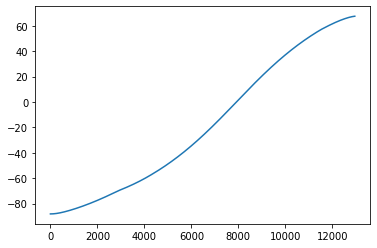

In [8]:
plt.plot(lat[:,0])

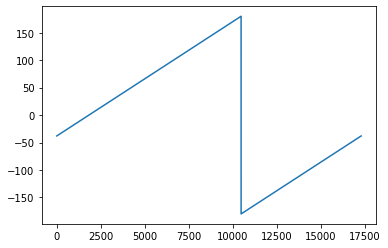

In [17]:
plt.plot(lon[10000,:])

In [20]:
a = np.where(lat[:,0] == np.find_nearest(lat[:,0] == 30.))

AttributeError: module 'numpy' has no attribute 'find_nearest'

In [33]:
dx = (np.abs(lat[:,1000].values - 40.)).argmin()
print(dx)

10195


In [26]:
lat[9558,0]

<xarray.DataArray 'YC' ()>
array(29.997131, dtype=float32)
Coordinates:
    i        int64 0
    j        int64 9558
    CS       float32 1.0
    Depth    float32 3379.1543
    PHrefC   float32 15.4017
    SN       float32 1.9692216e-13
    XC       float32 -37.989582
    YC       float32 29.997131
    Z        float32 -1.57
    Zl       float32 -1.0
    Zu       float32 -2.14
    drF      float32 1.14
    hFacC    float32 1.0
    rA       float32 3702066.2
Attributes:
    coordinate:     YC XC
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north

In [ ]:
ds1 = ds.sel({'': slice(3,4)})

In [48]:
a = ds.where((ds.YC > 30.) & (ds.YC <40.), drop=True)

In [43]:
a

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 636, j_g: 12960, k: 5, k_l: 5, k_p1: 6, k_u: 5, time: 9030)
Coordinates:
  * k_p1     (k_p1) int64 0 1 3 5 10 30
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_l      (k_l) int64 1 3 5 10 30
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_u      (k_u) int64 1 3 5 10 30
  * k        (k) int64 1 3 5 10 30
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * j        (j) int64 9559 9560 9561 9562 9563 ... 10191 10192 10193 10194
    CS       (j, i) float32 1.0 1.0 1.0 1.0 ... -0.0 4.450871e-13 2.2259172e-13
    Depth    (j, i) float32 3377.536 3299.69 3285.0981 ... 4478.53 4478.53
    PHrefC   float32 15.4017
    PHrefF   (k_p1) float32 dask.array<chunksize=(6,), meta=np.ndarray>
    SN       (j, i) 